In [119]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [120]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [121]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text


In [122]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [123]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [124]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [127]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
print(most_recent_date)

#Alternate method
alt_most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(alt_most_recent_date)

2017-08-23
('2017-08-23',)


<Axes: xlabel='Date', ylabel='Inches'>

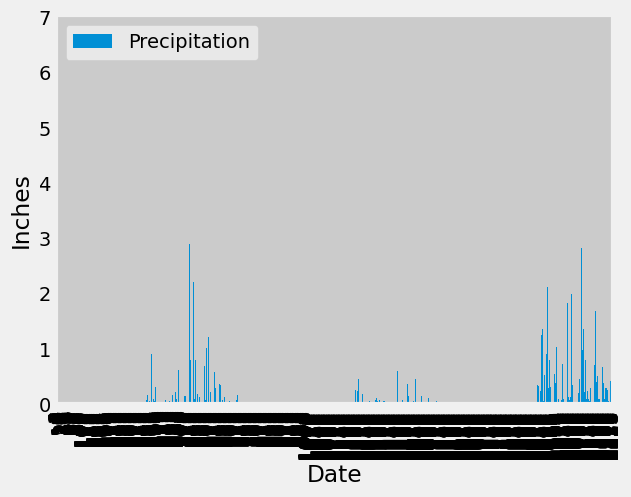

In [176]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

latest_data = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.

one_year_later = session.query(func.date(func.max(measurement.date), '-1 year')).scalar()

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_later).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date

df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(kind='bar', ylabel= "Inches", xlabel= "Date")

In [163]:
# Use Pandas to calculate the summary statistics for the precipitation data
df2.describe()

,Precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [178]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
print(total_stations)

9


In [210]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [220]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_data = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station=='USC00519281').all()
print(most_act_data)

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 4.183333333333314, 'Temperature')

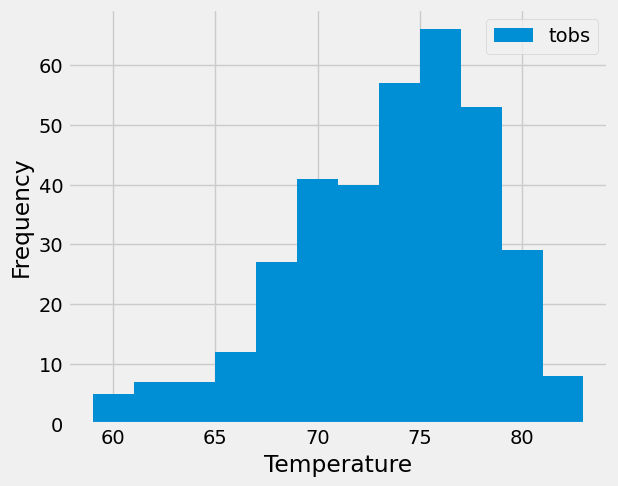

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()